# Lecture 2.1: Introduction to NumPy & pandas

[**Lecture slides**](https://docs.google.com/presentation/d/1R9mpEMQpoIyZGTTlKhTg_5jb9-mMDA1zDXtOK_75yYQ/edit?usp=sharing)


This lecture, we are getting to know the two python libraries at the heart of data analysis: [NumPy](https://numpy.org/) and [pandas](https://pandas.pydata.org/).

**Learning goals:**
- Explain the difference between NumPy ndarrays, pandas Series, and pandas DataFrames
- Construct ndarrays, Series, and DataFrames
- Carry out basic operations on a ndarrays, Series, and DataFrames
- Show the need for efficient maths & data librairies

---

## 1. NumPy

💪 Before we start playing with numpy, we have to install the package to have access to the library. I have added `numpy` and `pandas` to the `Pipfile` in the root directory of this repository. To install them in your virtual environment, please close this jupyter server, go to the root directory of the repo, and run the following:

    pipenv install
    
`pipenv` should read the updated `Pipfile` and take care of the installation for you. Once it's done, we can re-open the jupyter server and have access to NumPy 😎.

ℹ️ When importing NumPy, the convention is to use the name `np`. You don't technically have to follow this convention, but please do, as it will make your code more readable and shareable. 

💪 Appreciate running your first numpy import... this will be the first of many! 🎊

In [1]:
import numpy as np

### 1.1 Array creation

In the world of NumPy, the main class is the `ndarray`. According to the [documentation](https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html):
> An ndarray is a multidimensional container of items of the same type and size

In other words, they are efficient data structures for vectors and matrices, like these ones:


$$
\begin{equation*}
a = 
\begin{bmatrix}
1 \\
2 \\
3 \\
4
\end{bmatrix}
; \,
B = 
\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6 
\end{pmatrix}
\end{equation*}
$$


Vectors, like $a$ above, can be created by passing a python list as argument to `np.array()`:

In [2]:
a = np.array([1, 2, 3, 4])
a

array([1, 2, 3, 4])

The output looks a lot like a regular list... 🧐 Fear not, arrays can also be _multi-dimentional_ 👻. Matrices like $B$ can be created by passing one python list per row to `np.array()`:

In [3]:
B = np.array([[1, 2, 3], [4, 5, 6]])
B

array([[1, 2, 3],
       [4, 5, 6]])

NumPy is _intended_ for maths. It's in the name! So it comes with a lots of neat inbuilt constructor methods for `ndarray`. Here's some examples:

In [4]:
np.zeros([2, 3])

array([[0., 0., 0.],
       [0., 0., 0.]])

In [5]:
np.ones([2, 3])

array([[1., 1., 1.],
       [1., 1., 1.]])

In [6]:
np.arange(-3, 10)

array([-3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9])


💪 Now your turn, can you use `.linspace()` to return a 1D array of 8 equally spaced numbers between -3 & 10? Pro-tip: always check the documentation if this is your first time using a method. You can do that with the `?` prefix in this notebook, or by looking for it online.

In [7]:
np.linspace(-3,10,8)

array([-3.        , -1.14285714,  0.71428571,  2.57142857,  4.42857143,
        6.28571429,  8.14285714, 10.        ])

🧠 What's the main difference between `.arange()` and `.linspace()`? Similar but easy to get confused

### 1.2 Basic Operations

One of the most convenient things about NumPy is that it's very integrated with python. It overloads a lot of operators. For example, accessing a number in an `ndarray` is exactly like selecting an element in a list:

In [8]:
a = np.array([0, 1, 1, 2, 3, 5, 8, 13])
a[2]

1

The [list slicing notation](https://stackoverflow.com/questions/509211/understanding-slice-notation) works as well 🔪:

In [12]:
a[2:-1]

array([1, 2, 3, 5, 8])

Neat! This makes working with `ndarray` very "natural". In fact, sometimes it's easy to forget if you are dealing with an `ndarray` or a simple list, so try to keep track of your data types. You can always check them using the [`type()`](https://www.geeksforgeeks.org/python-type-function/) built-in function.

NumPy also overloads arithmetic operators:

In [13]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
a + b

array([5, 7, 9])

In [14]:
a * b

array([ 4, 10, 18])

As you might have noticed, piecewise operations are the default with python arithmetic operators. 

In [15]:
a @ b

32

🧠 Can you guess what the `@` operator does with `ndarray`? Check your answer by looking up the official documentation (or searching online).

### 1.3 NumPy Data Types


NumPy tries to make the _api_ very integrated with native python, but we know that in the backend... it runs C code! So it's not super clear what classes are running under the hood. Let's investigate what data types are used:

In [16]:
arr = np.array([1, 2, 3])
type(arr)

numpy.ndarray

As we already know, NumPy arrays are not python lists... but what's inside the `ndarray`? We fed a list of `int`s in the constructor in the cell just above, so maybe the `ndarray` holds `int`s?

In [17]:
type(arr[1])

numpy.int64

🙀 Wait a minute, that's not an `int`!

In [18]:
type(np.random.random(10)[3])

numpy.float64

And that's not a normal `float`! NumPy uses its own [data types](https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html) so it can be lightning fast ⚡️. These are called `dtypes`. In fact, there are many more `dtypes` than there are primitive data types in python! Here's a complete [list](https://numpy.org/devdocs/user/basics.types.html). No need to learn them all, NumPy will take care of the casting for you most of the time. But it's good to be aware that they exist should you be debugging your code, or worried about performance.

### 1.4 NumPy Performance

Let's see if NumPy is really as fast as it claims!

First, let's make a 1D `ndarray` with of length 10000. We'll fill it with random numbers $\in [0,1]$.

ℹ️ It's a good idea to explicitly set the seeds where you can, as it keeps results reproducible. A data scientist's nightmare would be to achieve a new state of the art result and be unable to repeat it afterwards! 

In [19]:
np.random.seed(0)
arr = np.random.random(10000)

In [21]:
arr

array([0.5488135 , 0.71518937, 0.60276338, ..., 0.75842952, 0.02378743,
       0.81357508])

Then, let's use NumPy's `.tolist()` method to convert the array to a native python list. This will also cast the elements from `np.float64` to python `float`.

In [20]:
lst = arr.tolist()

We can check that the two contain the same data:

In [22]:
print(f'The array is of size: {len(arr)}')
print(f'The list is of size: {len(lst)}')

print('The first three elements of the array are:')
print(arr[:3])
print('The first three elements of the list are:')
print(lst[:3])

The array is of size: 10000
The list is of size: 10000
The first three elements of the array are:
[0.5488135  0.71518937 0.60276338]
The first three elements of the list are:
[0.5488135039273248, 0.7151893663724195, 0.6027633760716439]


Now, let's imagine we want to filter elements that are smaller than a threshold. We can make one function for our NumPy `arr`, and one for our python `lst`.

In [23]:
def filter_list(lst, threshold):
    new_lst = []
    for e in lst:
        if e > threshold:
            new_lst.append(e)
    return new_lst

def filter_array(arr, threshold):
    return arr[arr > threshold]

Notice how the notation for the array filter is more terse? This uses a _boolean mask_. They are very useful and we'll cover them in more detail next lecture.

💪 Can you write another function called `filter_list_comprehension` where you use list comprehensions instead of a for loop to filter the values of `lst`? It should fit in one line! Add your code to the cell below. The unit test should not fail when the cell is run.

In [24]:
def filter_list_comprehension(lst, threshold):
    return [e for e in lst if e > threshold]

def test_filter_list_comprehension():
    assert len(filter_list_comprehension(lst, 0.5)) == 4936
    print('Success! 🎉')

test_filter_list_comprehension()

Success! 🎉


List comprehensions are terse, fast, and awesome. You should use them when you can, but be aware that sticking complex chains of operations in one line can also quickly become illegible!

Now let's use the `timeit` [magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html) to time the execution of our functions. `timeit` will run the expressions in loops to measure the average running time, so this may take a few seconds. We'll use an arbitrary threshold value of 0.7. 

In [25]:
%timeit filter_list(lst, 0.7)
%timeit filter_list_comprehension(lst, 0.7)
%timeit filter_array(arr, 0.7)

399 µs ± 9.87 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
303 µs ± 7.04 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
48 µs ± 1.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Wow, that's fast! 🏎 The list comprehension is faster than the for loop, but numpy is almost ten times as fast!

Gaining $300\,\mu s$ might not sound like like much, but remember this is a test with (only) 10000 values. When we'll deal with multi-dimensional arrays of millions of values, this speed up can make a huge difference!  

🧠 What's the difference between `timeit` and `time`?

## 2. Pandas

ℹ️ The convention is to use the name `pd` when importing pandas. Just like `np` & NumPy, you don't technically have to follow this convention, but please always do!
 
💪 This will also be your first time of many to import pandas! 🎊

In [26]:
# Always respect pd convention
import pandas as pd

/Users/amine/.local/share/virtualenvs/practical-data-scientist-umj5maBJ-python/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


### 2.1 Series

There are two main classes in the world of pandas. The first one is the `Series`. According to the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html):
> A Series is a one-dimensional ndarray with axis labels.

Notice how pandas leverage NumPy `ndarray`s as data structures. Also observe that a `Series` object wraps the array with "axis labels", also called an _index_. But before we dig into indices, let's see how `Series` are created. Just like the 1D `ndarray`, a Series constructor can take a python list as argument:

In [28]:
s = pd.Series([1, 2, 3, 4])
s

0    1
1    2
2    3
3    4
dtype: int64

The output statement details the NumPy `dtype` used in the inner `ndarray` of the Series. 

Overloading of list slicing syntax and arithmetic operators is also similar to NumPy:

In [29]:
s[2]

3

In [30]:
s[2::-1]

2    3
1    2
0    1
dtype: int64

In [31]:
s + s

0    2
1    4
2    6
3    8
dtype: int64

OK, so far, a Series looks and acts pretty much the same as a 1D `ndarray`. One exception is the "axis labels" we can see on the left hand side of the output statement: `0 1 2 3`.

These form the [`index`]() of the Series. `ndarray`s also have an index, since we can access them with the `arr[i]` syntax, but in pandas Series, the index is _explicit_. This means that we can select it and manipulate it as a first class object!

In [ ]:
s.index

In [ ]:
s.index[2]

In [ ]:
s.index[2:3]

Indexes don't have to be incremental integers. For example, let's sort a Series and see what happens to it.

💪 Sort the rows of the following series by _value_. No need to write a function here, just modify `s` so that the unit test passes. Pro-tip: look up the [official documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html).

In [ ]:
s = pd.Series([1, 3, 5, 2, 4, 0])
print(f'This is the original series:\n{s}')
# INSERT CODE HERE
print(f'This is the sorted series:\n{s}')

def test_sorted(s):
    assert s.is_monotonic_increasing
    print('Success! 🎉')
        
test_sorted(s)

Notice how the indices "stuck" with their value in the sorted series, and are now disordered? We can also use other data types as index labels:

In [ ]:
print('This series has a string index:\n')
s = pd.Series({'seven': 7, 'ate':8, 'nine':9})
print(s)
print('\nThis series has a date index:\n')
s = pd.Series(data=np.linspace(666, 1337, 3), index=pd.date_range('20121221', periods=3))
print(s)

Series are cool, but `ndarray`s could be _multi-dimensional_ and we learned that was useful in machine learning. This leads us to the second main class of pandas: the `DataFrame`.

### 2.2 DataFrame

According to the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html):
> A DataFrame is a two-dimensional, size-mutable, potentially heterogeneous tabular data.

The important term here is _tabular_. `DataFrame`s are the excel sheets of python! In other words, a `DataFrame` is a 2D indexed array.  This includes an inner 2D `ndarray`, the same row index as the `Series` class, as well as a list of column names. In fact, each column in a DataFrame is just a named `Series`.

Just like 2D `ndarray`s, we can create `DataFrame`s with one list per row:

In [27]:
df = pd.DataFrame([[1, 2, 3, 4], [5, 6, 7, 8]])
df

,0,1,2,3
0,1,2,3,4
1,5,6,7,8


Notice the index `0 1` on the LHS, and the column names `0 1 2 3` on top of the data array. Since columns are first class citizens in pandas (just like indices), we can manipulate and modify them directly! These default column names are bit a boring. Let's change them to something else:

In [32]:
df.columns = ['👌', '👽', 'ayy', 'lmao']
df

,👌,👽,ayy,lmao
0,1,2,3,4
1,5,6,7,8


Just like `ndarray`s and `Series`, `DataFrames` are closely integrated with python and overload common operators. They are also element wise by default.

In [33]:
df + df

,👌,👽,ayy,lmao
0,2,4,6,8
1,10,12,14,16


In [34]:
df * df

,👌,👽,ayy,lmao
0,1,4,9,16
1,25,36,49,64


Since we've only dealt with toy data this notebook, here's a little teaser of what one can do in a few lines of python with the pandas library. 😏 Let's create some fake financial data by adding a noise term to two lines. We then load this in a date-indexed `DataFrame`:

In [35]:
np.random.seed(1337)
data = {}
data['stonks'] = np.linspace(99, 101, 100) + np.random.random(100)
data['not stonks'] = np.linspace(101, 99, 100) + np.random.random(100)
stacks = pd.DataFrame(data=data, index=pd.date_range('20191223', periods=100))

The 100 rows of our `DataFrame` might be a bit too much to fit on our screen, but sometimes it's still helpful to keep an eye on the data. We can use `.head()`, which only returns the first 5 rows of our `DataFrame`.

In [36]:
stacks.head()

,stonks,not stonks
2019-12-23,99.262025,101.683653
2019-12-24,99.178886,101.007488
2019-12-25,99.318531,101.193439
2019-12-26,99.519923,101.675836
2019-12-27,99.401809,101.853402


pandas integrates [matplotlib](https://matplotlib.org/) in their api, so it's _super_ easy to plot `DataFrame` data:

<AxesSubplot:>

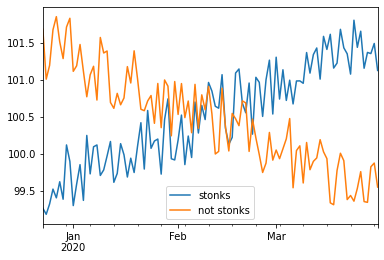

In [37]:
stacks.plot.line()

Data visualization is an entire field of data science, and we'll go over it in more detail during another lecture. But remember that the `DataFrame.plot` api is handy when exploring data. 👨‍🎨

🧠🧠 Can you explain how the lines defining `data['stonks']` and `data['not stonks']` translate to these plotted lines? Pro-tip: When dealing `ndarray`s, it helps to keep track of the dimension of your objects between operations.

## 3. Summary

Today, we have learned about **NumPy** and **pandas**, and how they are key tools for manipulating data in python. We understood that the **`ndarray`** is an efficient data structure for **matrices**, that the **`Series`** adds an **index** to these arrays, and that the **`DataFrame`** extends them in 2D to represent **tabular** data. We have learned how to **construct** and do **basic operations** with these three objects, by looking up **official documentation**. We've also measured their **performance** compared to python data structures. We even got a little taster of what financial analysis can look like with pandas. 💸

---


# Resources

## Core Resources

- [**Slides**](https://docs.google.com/presentation/d/1B66WgZfitY8FTMUu4I1Q5AihxTHJZwsqb3ZP4FgSsCg/edit?usp=sharing)
- [ndarray official documentation](https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html)
- [ndarray creation documentation](https://docs.scipy.org/doc/numpy/user/quickstart.html#array-creation)
- [Python Data Science handbook on numpy](https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html)
- [Series official documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)
- [DataFrame official documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)
- [Pandas getting started documentation](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html)

## Additional Resources

- [List slicing explained](https://stackoverflow.com/questions/509211/understanding-slice-notation)  
Stackoverflow post succinctly explaining the python list slicing notation
- [Learn NumPy in 5 minutes](https://youtu.be/xECXZ3tyONo)  
Terse video summary of basic numpy operations
- [3 numPy image transformations on baby yoda](https://towardsdatascience.com/3-numpy-image-transformations-on-baby-yoda-c27c1409b411)  
Short blog post with examples of ndarray manipulation
- [The ultimate begginer's guide to NumPy](https://towardsdatascience.com/the-ultimate-beginners-guide-to-numpy-f5a2f99aef54)  
- [Numpy example list](http://scipy.github.io/old-wiki/pages/Numpy_Example_List)  
Examples of all numpy methods